
### Part: Cryptocurrency Payment           
### Name: Jiaying Zhu
### Student ID: 44820888


Our team focus on the global markets and wants to choose digital currencies as the payment method for in-game sales rather than use fiat currencies, as there are following advantages using cryptocurrencies as the payment method. 

(1) Traditional international payments usually involve fees and exchange costs, cryptocurrencies only have very low transaction fees as there are no intermediate agencies.
(2) The transfer of cryptocurrency happens very quickly, eliminating the inconvenience of typical authorization requirements and wait periods.
(3) Cryptocurrency market is anonymous, users won't be tracked by third party companies.
(4) Users can get some fun using cryptocurrencies to pay for the game, and they may earn money if they hold some profitable coins.

I am going to select some coins for our game through explore data from a famous website called 'CoinMarketCap'.

In [1]:
library(tidyverse)
library(skimr)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(XML)
library(ggplot2)
library(gganimate)
library(gifski)
library(viridis)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse


Loading required package: xml2


Attaching package: 'rvest'


The following object is masked from 'package:purrr':

    pluck


The following object is masked from 'package:readr':

    guess_encoding



Attaching package: 'XML'


The following object is masked from 'package:rvest':

    xml


Warning message:
"package 'gganimate' was built un

In [2]:
#Firstly, we scrape the top 200 coins from a famous website called 'Coinmarketcap'

url <- "https://coinmarketcap.com/all/views/all/"
source <- readLines(url, encoding = "UTF-8", warn=FALSE)
parsed_doc <- htmlParse(source, encoding = "UTF-8")

#strip off non numeric characters but keep sign symbols
num_strip <- function(x)
{
  gsub("[^0-9.-]", "", x)
}


parse_page <- function()
{
  df <- data.frame()
  path <- '//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/thead/tr/th['
  header <- c()
  for(i in 1:10)
  {
    path_cell <- paste(path, i, ']')
    cell <- xpathSApply(parsed_doc, path = path_cell, xmlValue)
    header <-c(header, cell)
  }
  
  if(length(header) != 10)
    return
  for(i in 1:200)
  {
    path <- paste('//*[@id="__next"]/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[3]/div/table/tbody/tr[', i, ']/td[')
    
    for(j in 1:10)
    {
      path_cell <- paste(path, j, ']')
      cell <- xpathSApply(parsed_doc, path = path_cell, xmlValue)
      if(j == 2 || j == 3)
        df[i, j] <- cell
      else
        df[i, j] <- num_strip(cell)
    }
  }
  colnames(df) <- header
  df
}

save_data <- function()
{
  data <- parse_page()
  write.table(data, "crypto_currency.csv", sep = ",", col.names = !file.exists('crypto_currency.csv'), row.names = F, append = T)
}


save_data()

Warning message in write.table(data, "crypto_currency.csv", sep = ",", col.names = !file.exists("crypto_currency.csv"), :
"appending column names to file"


In [3]:
crypto<- read.csv(file ='crypto_currency.csv')

In [4]:
#After reading the csv file, let's take a closer look at our data structure. 
crypto %>%
    glimpse()

Rows: 200
Columns: 10
$ Rank               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
$ Name               <chr> "Bitcoin", "Ethereum", "Tether", "XRP", "Bitcoin...
$ Symbol             <chr> "BTC", "ETH", "USDT", "XRP", "BCH", "BNB", "LINK...
$ Market.Cap         <dbl> 211453112792, 42245311060, 15830866904, 10957090...
$ Price              <dbl> 11417.170000, 373.670000, 1.000000, 0.242156, 24...
$ Circulating.Supply <dbl> 18520625, 113056200, 15816963304, 45248061374, 1...
$ Volume..24h.       <dbl> 20014243944, 11360943502, 31869029009, 113081600...
$ X..1h              <dbl> 0.03, 0.17, 0.01, 0.03, -0.08, 0.03, 0.28, 0.02,...
$ X..24h             <dbl> 0.58, 1.40, 0.01, 0.05, -0.96, 0.78, 1.14, 2.60,...
$ X..7d              <dbl> 0.47, -0.19, -0.02, -5.81, 2.64, 8.51, 1.37, -5....


In [5]:
#Then I rename column names and print the first 5 rows. 
crypto <- crypto %>%
    rename(Market_Cap = 4,
           Price_USD = 5,
           Circulating_Supply = 6,
           Volume_24h = 7,
           Change_1h = 8,
           Change_24h = 9,
           Change_7d = 10)
crypto %>%
    head(5)

,Rank,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volume_24h,Change_1h,Change_24h,Change_7d
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Bitcoin,BTC,211453112792,11417.170000,18520625,20014243944,0.03,0.58,0.47
2,2,Ethereum,ETH,42245311060,373.670000,113056200,11360943502,0.17,1.40,-0.19
3,3,Tether,USDT,15830866904,1.000000,15816963304,31869029009,0.01,0.01,-0.02
4,4,XRP,XRP,10957090886,0.242156,45248061374,1130816008,0.03,0.05,-5.81
5,5,Bitcoin Cash,BCH,4601277658,248.070000,18548125,2102956413,-0.08,-0.96,2.64


In [6]:
#There are too many digits in the 'Price_USD', so it's better to round the digits to 2 decimal places
#In the web scraping part, we didn't scrape the '%' symbol for the last three columns. Thus I divide the numbers in these columns by 100 and print the first five rows.
crypto <- crypto %>%
        mutate(Price_USD = Price_USD %>% round(digits=2),
           Change_1h = Change_1h / 100,
           Change_24h = Change_24h / 100,
           Change_7d = Change_7d /100) 
crypto %>%
    head(5)
        

,Rank,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volume_24h,Change_1h,Change_24h,Change_7d
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Bitcoin,BTC,211453112792,11417.17,18520625,20014243944,0.0003,0.0058,0.0047
2,2,Ethereum,ETH,42245311060,373.67,113056200,11360943502,0.0017,0.0140,-0.0019
3,3,Tether,USDT,15830866904,1.00,15816963304,31869029009,0.0001,0.0001,-0.0002
4,4,XRP,XRP,10957090886,0.24,45248061374,1130816008,0.0003,0.0005,-0.0581
5,5,Bitcoin Cash,BCH,4601277658,248.07,18548125,2102956413,-0.0008,-0.0096,0.0264


In [7]:
# delete the 'Rank' column 
crypto <- crypto %>%
        select(-Rank)

crypto %>%
    head()

,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volume_24h,Change_1h,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bitcoin,BTC,211453112792,11417.17,18520625,20014243944,0.0003,0.0058,0.0047
2,Ethereum,ETH,42245311060,373.67,113056200,11360943502,0.0017,0.0140,-0.0019
3,Tether,USDT,15830866904,1.00,15816963304,31869029009,0.0001,0.0001,-0.0002
4,XRP,XRP,10957090886,0.24,45248061374,1130816008,0.0003,0.0005,-0.0581
5,Bitcoin Cash,BCH,4601277658,248.07,18548125,2102956413,-0.0008,-0.0096,0.0264
6,Binance Coin,BNB,4440781520,30.75,144406561,433111895,0.0003,0.0078,0.0851


In [8]:
#The sequence of the cryptocurrencies is ordered by the marketcap, now let's explore the newest transaction volume data
vol <- crypto %>%
    select(Name, Symbol, Volume_24h, Price_USD, Change_24h, Change_7d) 

vol %>%
    head()

,Name,Symbol,Volume_24h,Price_USD,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bitcoin,BTC,20014243944,11417.17,0.0058,0.0047
2,Ethereum,ETH,11360943502,373.67,0.0140,-0.0019
3,Tether,USDT,31869029009,1.00,0.0001,-0.0002
4,XRP,XRP,1130816008,0.24,0.0005,-0.0581
5,Bitcoin Cash,BCH,2102956413,248.07,-0.0096,0.0264
6,Binance Coin,BNB,433111895,30.75,0.0078,0.0851


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:viridis':

    viridis_pal


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Warning message:
"Removed 1 rows containing missing values (geom_point)."


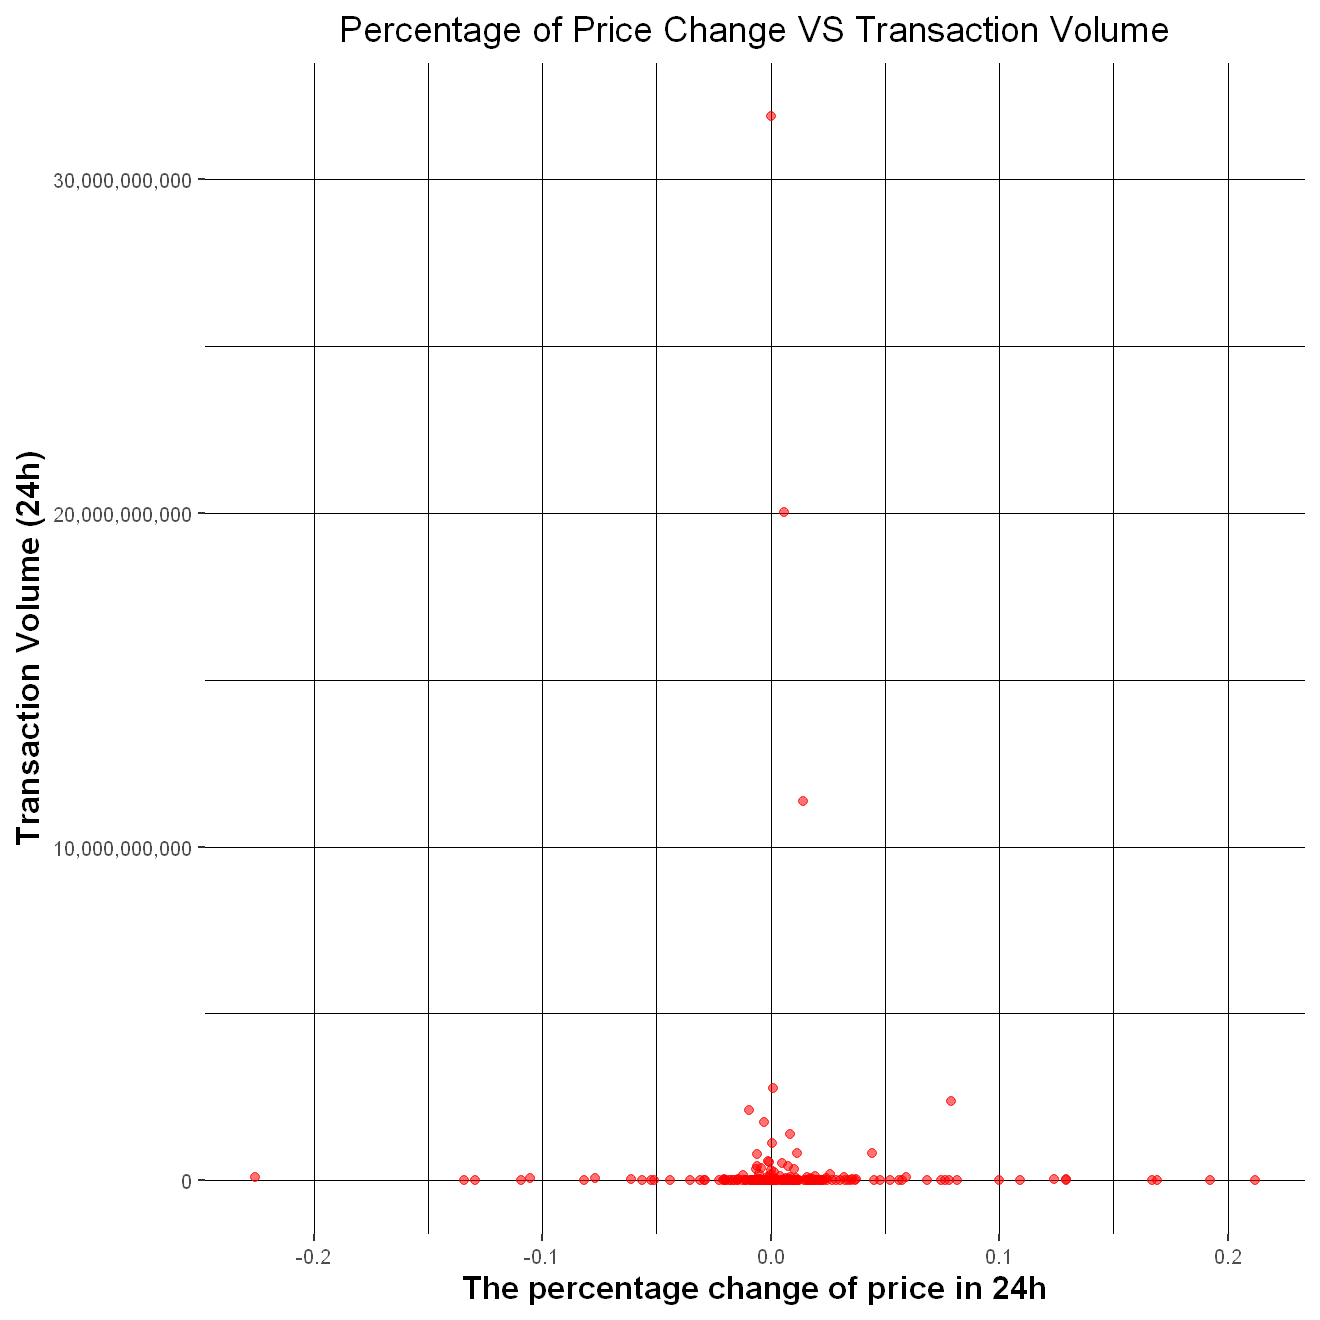

In [9]:
#I want to know is there any relationship between the percentage change of price in 24h and the transaction volume in last 24hours 
require(scales) 
options(repr.plot.width = 11, repr.plot.height = 11) #adjust the size of the following plots
theme_set(theme_gray(base_size = 18)) # adjust the size of the title, x-lab,y-lab texts
vol %>%
    ggplot(
    mapping=aes(x=Change_24h, y= Volume_24h, alpha=1/200)) +
    geom_point(colour = "red", size = 2.5) + guides(alpha=FALSE) +
    xlab('The percentage change of price in 24h') + 
    ylab('Transaction Volume (24h)') + 
    ggtitle('Percentage of Price Change VS Transaction Volume') +
    theme(plot.title = element_text(hjust=0.5), 
    panel.background = element_rect(fill = "white", colour = "white",size = 0.4, linetype = "solid"), 
    panel.grid.major = element_line(size = 0.4, linetype = 'solid',colour = "black"),
    panel.grid.minor = element_line(size = 0.24, linetype = 'solid',colour = "black"),
    strip.background = element_rect(color="black", fill="#FFFDE7", size=1, linetype="solid")) +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=19,face="bold")) + scale_y_continuous(labels = comma)
    

As we can see from the graph, investors' buy and sell strategy won't be affected by the percentage change of price in last 24 hours although it is a 24 hours market.
Also, we can notice that there are three cryptocurrencies have higher transaction volume than others, and their prices have not changed much within the last 7 days.

In [10]:
#Let's explore the top3 transaction volume coins
vol_24h_top3 <- vol %>%
    arrange(desc(Volume_24h)) %>%
    head(3)

vol_24h_top3

,Name,Symbol,Volume_24h,Price_USD,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tether,USDT,31869029009,1.00,0.0001,-0.0002
2,Bitcoin,BTC,20014243944,11417.17,0.0058,0.0047
3,Ethereum,ETH,11360943502,373.67,0.0140,-0.0019


The highest transaction volume in 24h is Tether(USDT). USDT is a stable coin that mirrors the price of the US dollar. Thus, investors can buy this currency when 
the market changes drastically to avoid risk. There is no doubt that the actual most popular cryptocurrency is Bitcoin, with around 20 billion transaction volume 
within 24 hours. ETH is still a popular coin following Bitcoin with around 10 billion transaction volume. 

So far, Tether, Bitcoin, and Ethereum got my attention as these three coins are most popular recently.
What about historical performance? I decide to explore the historical data of top5 coins. 

In [11]:
crypto %>%
    head(5)

,Name,Symbol,Market_Cap,Price_USD,Circulating_Supply,Volume_24h,Change_1h,Change_24h,Change_7d
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bitcoin,BTC,211453112792,11417.17,18520625,20014243944,0.0003,0.0058,0.0047
2,Ethereum,ETH,42245311060,373.67,113056200,11360943502,0.0017,0.0140,-0.0019
3,Tether,USDT,15830866904,1.00,15816963304,31869029009,0.0001,0.0001,-0.0002
4,XRP,XRP,10957090886,0.24,45248061374,1130816008,0.0003,0.0005,-0.0581
5,Bitcoin Cash,BCH,4601277658,248.07,18548125,2102956413,-0.0008,-0.0096,0.0264


In [12]:
#I use this function to get the dataframe of the top 5 market cap coins (Tether, Bitcoin, Ethereum, XRP, Bitcoin Cash)
get_df <- function(url){
    content <- url %>% read_html() 
    table <- html_nodes(content, "table")
    rows <- (html_nodes(table, "tr")[-1])
    values <- html_text(html_nodes(rows, "td")[1:2562]) 
    finaltable <-as.data.frame(matrix(values, ncol=7, byrow=TRUE)) %>%
    rename(c("Date" = "V1", "Open" = "V2", "High" = "V3", "Low" = "V4", "Close" = "V5", "Volume" = "V6", "Market_Cap" = "V7"))
    return (finaltable)
}

In [13]:
# This function can merge the dataframe of the top 5 market cap coins into one dataframe, which include the data for the last 12 months

empty_list <- list()
merge_df <- function(name){
    for(i in 1:5){
          name_now <- name[i]
          url <- glue('https://coinmarketcap.com/currencies/{name_now}/historical-data/?start=20191016&end=20201016')
          df.now <- get_df(url) 
          df.now['Name_Coin'] = name_now
          df.now['Year_to_No.days'] = c(366:1) # construct the data frame-no. of days in year
          df.now[] <- lapply(df.now, gsub, pattern=',', replacement='') # remove commas
          df.now[2] <- lapply(df.now[2], as.numeric) # set column 2 as numeric
          df.now[3] <- lapply(df.now[3], as.numeric) # set column 3 as numeric
          df.now[4] <- lapply(df.now[4], as.numeric) # set column 4 as numeric
          df.now[5] <- lapply(df.now[5], as.numeric) # set column 5 as numeric
          df.now[6] <- lapply(df.now[6], as.numeric) # set column 6 as numeric
          df.now[7] <- lapply(df.now[7], as.numeric) # set column 7 as numeric
          df.now[9] <- lapply(df.now[9], as.numeric) # set column 7 as numeric
          empty_list[[i]] <- df.now          
        }
    final_df <- do.call(rbind,empty_list)
    return (final_df)
}
final_df = c('tether', 'bitcoin', 'ethereum', 'xrp', 'bitcoin-cash') %>% merge_df()
final_df <- final_df %>% mutate_if(is.numeric, round)

final_df 

Date,Open,High,Low,Close,Volume,Market_Cap,Name_Coin,Year_to_No.days
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Oct 17 2020,1,1,1,1,31063236700,15817975341,tether,366
Oct 16 2020,1,1,1,1,42355198410,15787627470,tether,365
Oct 15 2020,1,1,1,1,40681227712,15762741555,tether,364
Oct 14 2020,1,1,1,1,42676684541,15759653344,tether,363
Oct 13 2020,1,1,1,1,41852256541,15758961791,tether,362
Oct 12 2020,1,1,1,1,45422749776,15741941344,tether,361
Oct 11 2020,1,1,1,1,36190854082,15733015683,tether,360
Oct 10 2020,1,1,1,1,41298643279,15722861220,tether,359
Oct 09 2020,1,1,1,1,33919229078,15651214863,tether,358


In [14]:
#Then I do some wrangling to get the data from for the plot 
final_df1 <- final_df
final_df1$'Volume' <- as.numeric(final_df1$'Volume') / 1000000
final_df1$'Market_Cap' <- as.numeric(final_df1$'Market_Cap') / 100000000
final_df1 <- final_df1 %>% mutate_if(is.numeric, round)
final_df1[9] <- lapply(final_df1[9], as.integer) # set column 9 as numeric
names(final_df1)[9] <- "Days"
final_df2 <- final_df1 %>% group_by(Days, Name_Coin)
final_df2 %>% head(5) 

Date,Open,High,Low,Close,Volume,Market_Cap,Name_Coin,Days
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Oct 17 2020,1,1,1,1,31063,158,tether,366
Oct 16 2020,1,1,1,1,42355,158,tether,365
Oct 15 2020,1,1,1,1,40681,158,tether,364
Oct 14 2020,1,1,1,1,42677,158,tether,363
Oct 13 2020,1,1,1,1,41852,158,tether,362


In [15]:
#I want to see the transation volume and market cap trends of top5 coins in the last 12 months
require(scales)
options(repr.plot.width = 22, repr.plot.height = 26) #adjust the size of the following plots
theme_set(theme_gray(base_size = 20)) # adjust the size of the title, x-lab,y-lab texts

gif_plot2 <- ggplot(final_df2, aes(Market_Cap, Volume, size=Volume, color=Name_Coin)) +
  geom_point(alpha=0.7) + transition_time(Days) +
  facet_wrap(~Name_Coin, scales="free") + scale_y_continuous(labels = comma) +
  labs(title = 'Transaction Volume VS Market Cap', subtitle = 'Days: {frame_time}', x = 'Market Cap(*10^8)', y = 'Transaction Volume(*10^6)') + 
  shadow_wake(wake_length = 0.1) + theme_minimal() + theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"))
  
animate(
  plot = gif_plot2, # insert plot
  nframes=90, # control the speed of movement
  height = 700, # height of the plot
  width = 1000, # width of the plot
  fps = 2 # control how smooth of the movement
)


Rendering [--------------------------------------------] at 2.4 fps ~ eta: 36s

Rendering [>---------------------------------------------] at 2 fps ~ eta: 44s

Rendering [>-------------------------------------------] at 2.1 fps ~ eta: 42s

Rendering [=>------------------------------------------] at 2.2 fps ~ eta: 40s

Rendering [=>------------------------------------------] at 2.2 fps ~ eta: 38s

Rendering [==>-----------------------------------------] at 2.2 fps ~ eta: 37s

Rendering [==>-----------------------------------------] at 2.3 fps ~ eta: 37s

Rendering [===>----------------------------------------] at 2.3 fps ~ eta: 36s

Rendering [====>---------------------------------------] at 2.3 fps ~ eta: 35s

Rendering [=====>--------------------------------------] at 2.3 fps ~ eta: 34s

Rendering [======>-------------------------------------] at 2.3 fps ~ eta: 34s

Rendering [======>-------------------------------------] at 2.2 fps ~ eta: 34s

Rendering [=======>--------------------

This is just a screen shot, the result is saved as 'gif_plot2'

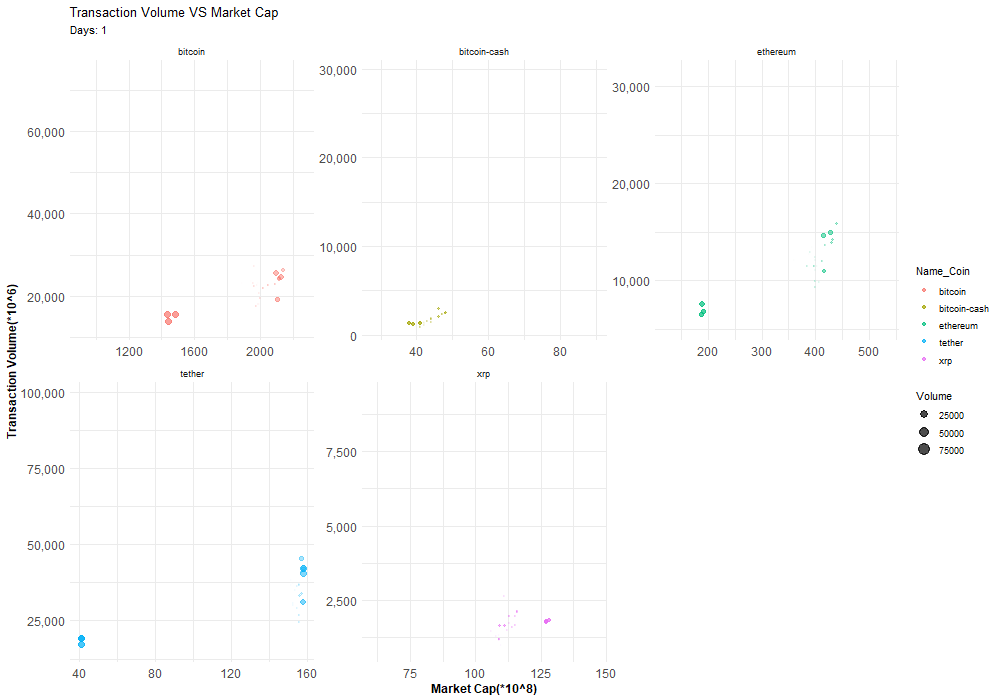

A closer look at the 'gif_plot2', we can find that Bitcoin, Ethereum and Tether are more active in the last 12 months compares to the Bitcoin Cash and XRP. Moreover, Bitcoin and Ethereum have higher market cap in the last 12 months. The transaction volume of Teather is also very impressive. In general, Bitcoin, Ethereum and Tether have higher market caps and transaction volume in the previous 12 months. 

In [17]:
#I prefer to observe more clearly about the transaction volume trends of top5 coins in the last 12 months
require(scales) 
options(repr.plot.width = 22, repr.plot.height = 26) #adjust the size of the following plots
theme_set(theme_gray(base_size = 20)) # adjust the size of the title, x-lab,y-lab texts
gif_plot3 <- ggplot(final_df1, aes(x=Days, y=Volume, color=Name_Coin)) +
    geom_line() +
    geom_point() +  facet_wrap(~Name_Coin, scales="free") +
    transition_reveal(Days) + 
    scale_color_viridis(discrete = TRUE) +
    scale_y_continuous(labels = comma) + # convert scientific number to natural number
    labs(title = 'Transaction Volume VS Number of days', x = 'Number of days(Starts from 16 OCT 2019 TO 16 OCT 2020)', y = 'Transaction Volume(*10^6)') + # set title and x axis and y axis text
    theme_minimal() + theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold")) # remove grey color background of the plot
  
animate(
  plot = gif_plot3, # insert plot
  nframes=90,       # control the speed of movement
  height = 700,     # height of the plot
  width = 1000,     # width of the plot
  fps = 4           # control how smooth of the movement
)


Rendering [--------------------------------------------] at 2.3 fps ~ eta: 39s

Rendering [>---------------------------------------------] at 2 fps ~ eta: 45s

Rendering [>-------------------------------------------] at 1.9 fps ~ eta: 45s

Rendering [=>--------------------------------------------] at 2 fps ~ eta: 43s

Rendering [==>-------------------------------------------] at 2 fps ~ eta: 42s

Rendering [==>-------------------------------------------] at 2 fps ~ eta: 41s

Rendering [==>-----------------------------------------] at 2.1 fps ~ eta: 40s

Rendering [===>----------------------------------------] at 2.1 fps ~ eta: 39s

Rendering [===>----------------------------------------] at 2.1 fps ~ eta: 38s

Rendering [====>---------------------------------------] at 2.1 fps ~ eta: 37s

Rendering [====>---------------------------------------] at 2.2 fps ~ eta: 37s

Rendering [=====>--------------------------------------] at 2.2 fps ~ eta: 36s

Rendering [=====>----------------------

This is just a screen shot, the result is saved as 'gif_plot3'

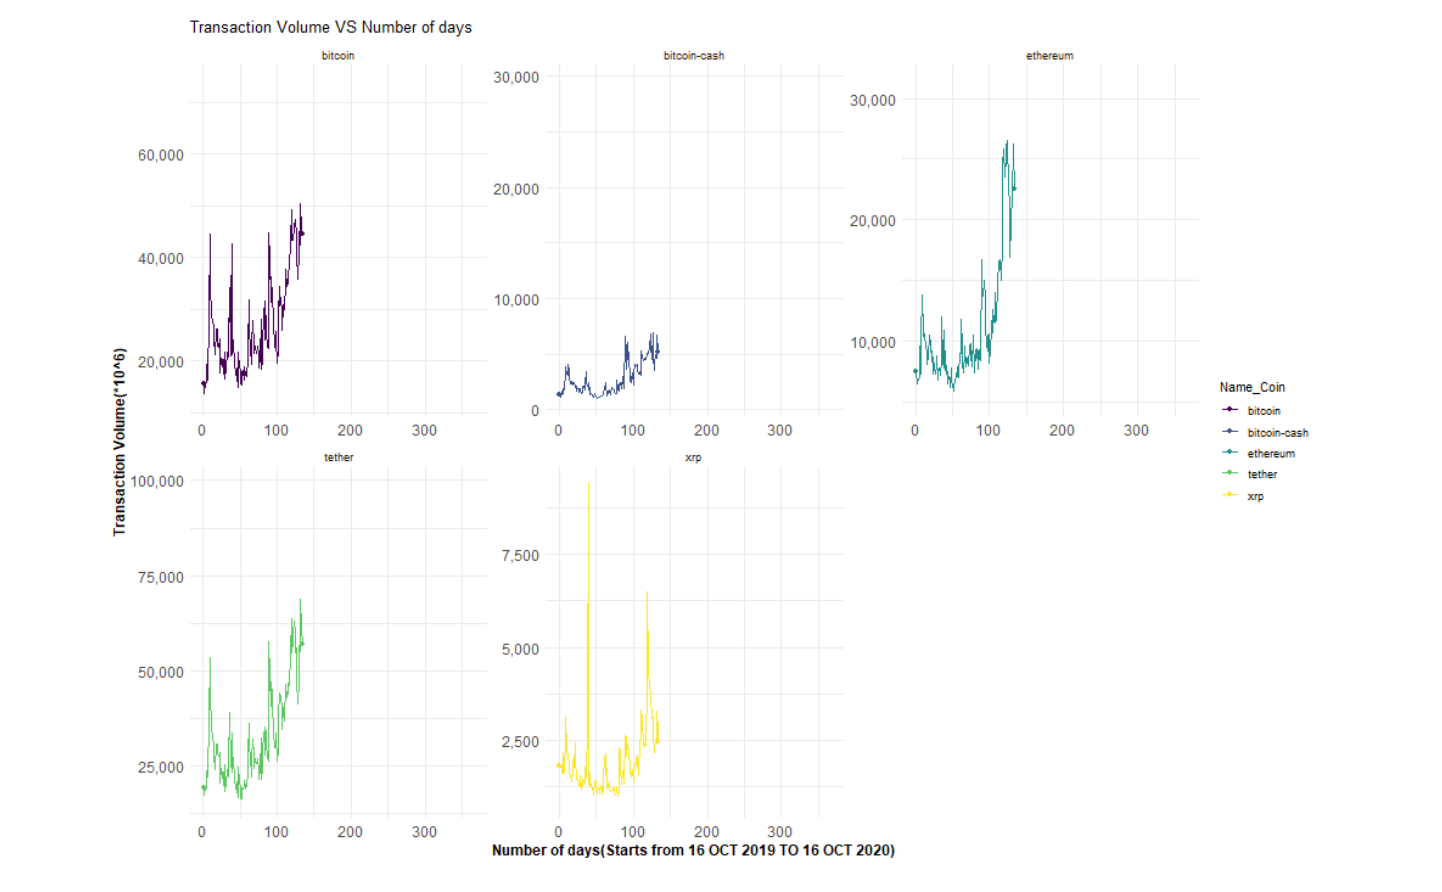

A closer look at the 'gif_plot3', I notice that the transaction volume of Bitcoin Cash and XRP has fluctuated dramatically. Moreover, Bitcoin, Ethereum and Tether have higher transaction volume compared to Bitcoin Cash as well as XRP. It is interesting that the transaction volume trend of Ethereum and Tether seems followed by that of Bitcoin. I guess it is because bitcoin accounted for around 60% market cap of the cryptocurrency market. 

Finally, I chose Bitcoin, Ethereum and Tether as the accepted payment method for our game. 